In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from scipy import stats

# Load and Understand the Data

In [ ]:

df = pd.read_csv("/content/Food_Delivery_Times.csv")  # Or use any built-in dataset
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [ ]:
df['Courier_Experience_yrs']=df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


### Outliers

<Axes: >

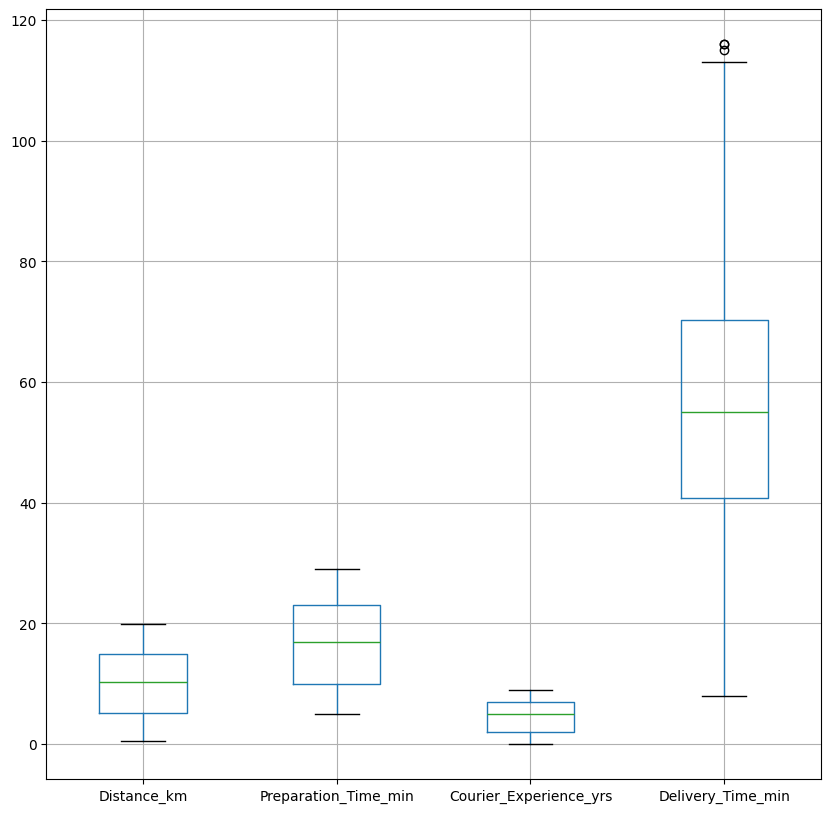

In [ ]:
# draw box plot for all nermic columns
df.boxplot(figsize=(10,10))

In [ ]:
import pandas as pd
q1 =df['Delivery_Time_min'].quantile(0.25)
q3 =df['Delivery_Time_min'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1-1.5*IQR

upper_bound = q3+1.5*IQR

#drop outliers

df=df[(df['Delivery_Time_min']>= lower_bound) & (df['Delivery_Time_min']<= upper_bound)]

In [ ]:
df['Weather'].unique()

array(['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy', nan], dtype=object)

In [ ]:
df['Traffic_Level'].unique()

array(['Low', 'Medium', 'High', nan], dtype=object)

In [ ]:
df['Time_of_Day'].unique()

array(['Afternoon', 'Evening', 'Night', 'Morning', nan], dtype=object)

In [ ]:
df['Vehicle_Type'].unique()

array(['Scooter', 'Bike', 'Car'], dtype=object)

/tmp/ipython-input-122-1234711976.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Weather'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')
/tmp/ipython-input-122-1234711976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Weather'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')


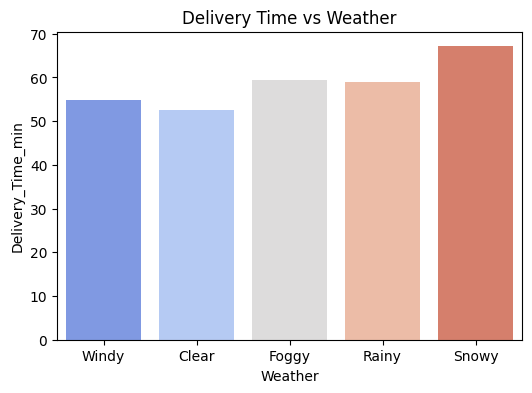

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['Weather'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')
plt.title('Delivery Time vs Weather')
plt.show()


/tmp/ipython-input-123-327698323.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Traffic_Level'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')
/tmp/ipython-input-123-327698323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Traffic_Level'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')


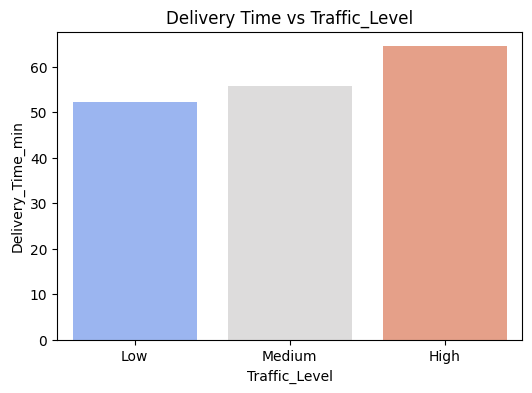

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['Traffic_Level'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')
plt.title('Delivery Time vs Traffic_Level')
plt.show()

/tmp/ipython-input-124-3190554590.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Time_of_Day'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')
/tmp/ipython-input-124-3190554590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Time_of_Day'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')


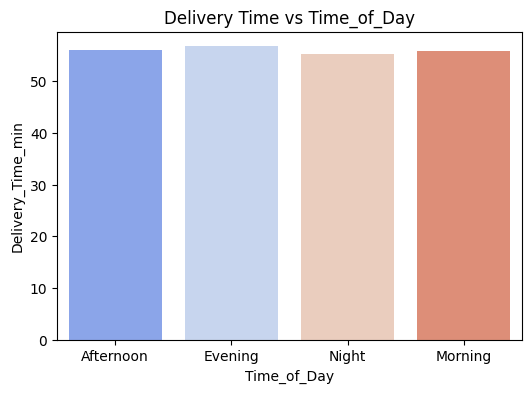

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['Time_of_Day'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')
plt.title('Delivery Time vs Time_of_Day')
plt.show()

/tmp/ipython-input-125-3810450278.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Vehicle_Type'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')
/tmp/ipython-input-125-3810450278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Vehicle_Type'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')


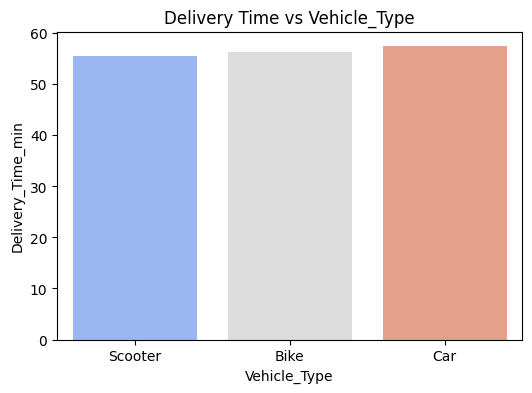

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['Vehicle_Type'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')
plt.title('Delivery Time vs Vehicle_Type')
plt.show()

In [ ]:
# delete null
df.dropna(inplace=True)

In [ ]:
#check the table size
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                908 non-null    int64  
 1   Distance_km             908 non-null    float64
 2   Weather                 908 non-null    object 
 3   Traffic_Level           908 non-null    object 
 4   Time_of_Day             908 non-null    object 
 5   Vehicle_Type            908 non-null    object 
 6   Preparation_Time_min    908 non-null    int64  
 7   Courier_Experience_yrs  908 non-null    float64
 8   Delivery_Time_min       908 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.9+ KB


In [ ]:
# delete nuwated columns
df=df.drop(['Order_ID','Time_of_Day','Vehicle_Type'],axis=1)

In [ ]:
#merge foggy and rainy under one name
df['Weather']=df['Weather'].replace({'Foggy':'bad_weather','Rainy':'bad_weather'})
df['Weather'].unique()

array(['Windy', 'Clear', 'bad_weather', 'Snowy'], dtype=object)

/tmp/ipython-input-130-3747902617.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Weather'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')
/tmp/ipython-input-130-3747902617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Weather'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')


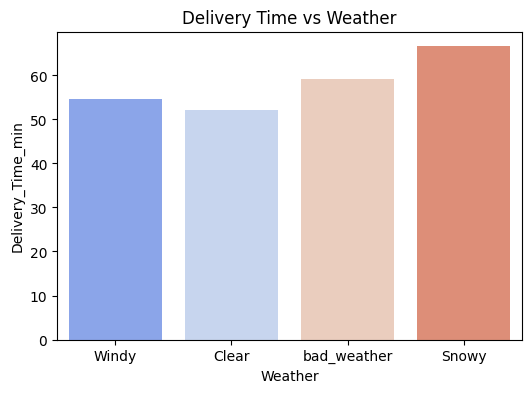

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['Weather'],y=df['Delivery_Time_min'],data=df,estimator='mean',ci=None,palette='coolwarm')
plt.title('Delivery Time vs Weather')
plt.show()

In [ ]:
df.head()

,Distance_km,Weather,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,12,1.0,43
1,16.42,Clear,Medium,20,2.0,84
2,9.52,bad_weather,Low,28,1.0,59
3,7.44,bad_weather,Medium,5,1.0,37
4,19.03,Clear,Low,16,5.0,68


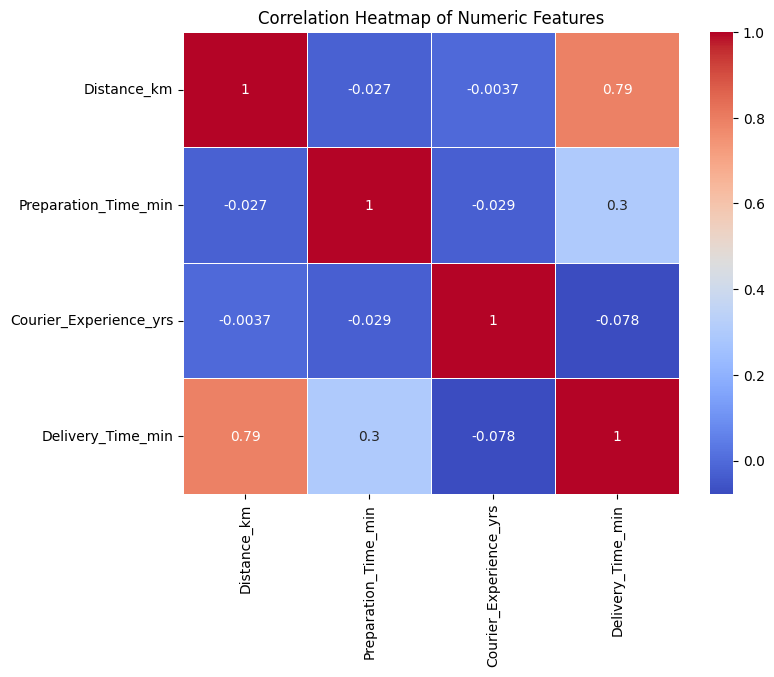

In [ ]:

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Plot heatmap on the numeric data
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
#df=df.drop(['Courier_Experience_yrs'],axis=1)
df.head()

,Distance_km,Weather,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,12,1.0,43
1,16.42,Clear,Medium,20,2.0,84
2,9.52,bad_weather,Low,28,1.0,59
3,7.44,bad_weather,Medium,5,1.0,37
4,19.03,Clear,Low,16,5.0,68


In [ ]:

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Snowy,Weather_Windy,Weather_bad_weather,Traffic_Level_Low,Traffic_Level_Medium
0,7.93,12,1.0,43,False,True,False,True,False
1,16.42,20,2.0,84,False,False,False,False,True
2,9.52,28,1.0,59,False,False,True,True,False
3,7.44,5,1.0,37,False,False,True,False,True
4,19.03,16,5.0,68,False,False,False,True,False


In [ ]:
df.head(1)

,Distance_km,Weather,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,12,1.0,43


# Simple Linear regresion

In [ ]:
#  Select Features (just use 1 feature for simple linear regression)
X = df[['Distance_km']]  # Median Income
y = df['Delivery_Time_min']  # Median House Value

In [ ]:
#  Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

#  Predictions
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 149.43
R² Score: 0.66


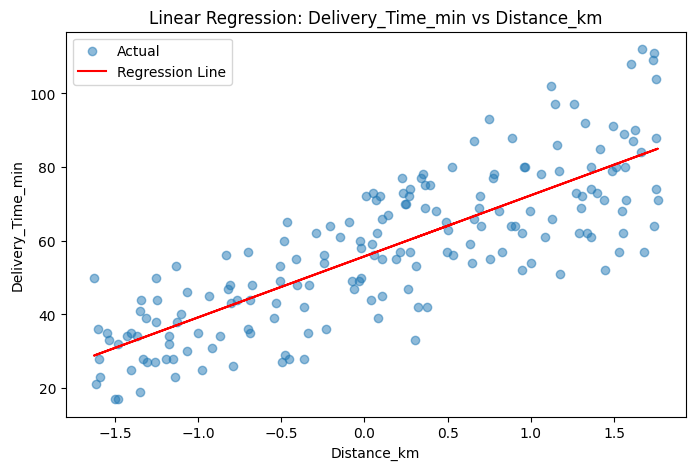

In [ ]:
#  Plot Regression Line
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, label="Actual", alpha=0.5)
plt.plot(X_test, y_pred, color='red', label="Regression Line")
plt.xlabel("Distance_km")
plt.ylabel("Delivery_Time_min")
plt.title("Linear Regression: Delivery_Time_min vs Distance_km")
plt.legend()
plt.show()


# multiple linear Regression


In [ ]:

X = df_encoded.drop(columns=['Delivery_Time_min'])  # or keep only relevant
y = df_encoded['Delivery_Time_min']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.8840255055114679
MSE: 50.359151263415534


In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                  Feature  Coefficient
0             Distance_km    16.337225
1    Preparation_Time_min     6.631896
3           Weather_Snowy     3.264240
5     Weather_bad_weather     2.882717
4           Weather_Windy     0.398510
2  Courier_Experience_yrs    -1.478757
7    Traffic_Level_Medium    -3.018144
6       Traffic_Level_Low    -5.818217


Text(0.5, 1.0, 'Residuals vs Predicted')

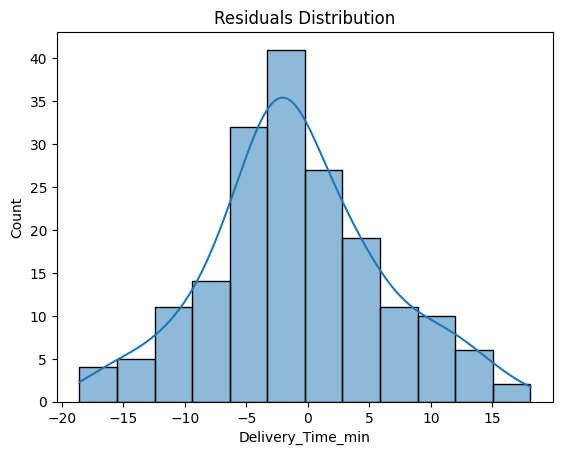

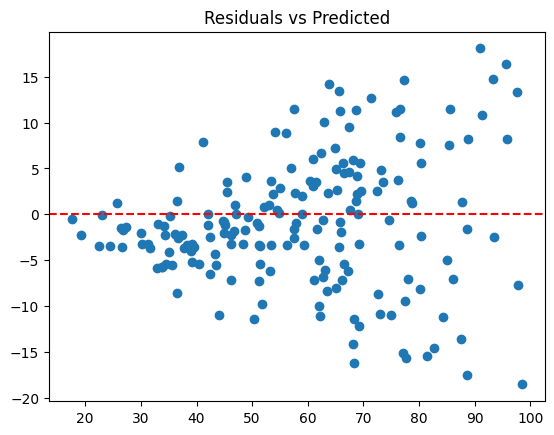

In [ ]:

residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")

# Polynomial Regression

In [ ]:
X = df_encoded.drop(columns=['Delivery_Time_min'])  # or keep only relevant
y = df_encoded['Delivery_Time_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test_poly)

In [ ]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 56.060485191624906
R2 Score: 0.8708956313248323


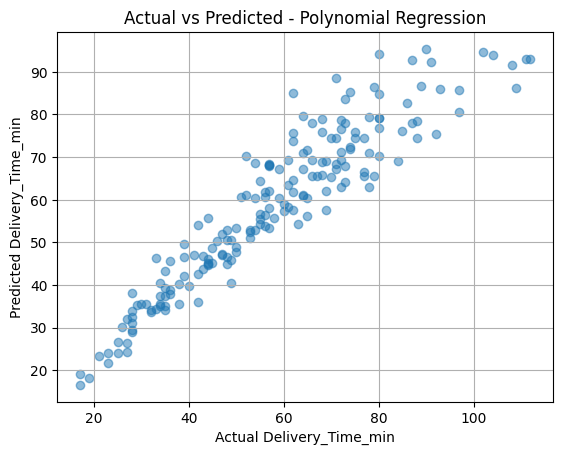

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Delivery_Time_min")
plt.ylabel("Predicted Delivery_Time_min")
plt.title("Actual vs Predicted - Polynomial Regression")
plt.grid(True)
plt.show()


# Ridge Regression (L2 Regularization)

In [ ]:
X = df_encoded.drop(columns=['Delivery_Time_min'])  # or keep only relevant
y = df_encoded['Delivery_Time_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

ridge = Ridge(alpha=1.0)  # you can try alpha=0.1, 10, etc.
ridge.fit(X_train, y_train)


Ridge()

In [ ]:
# Predict
y_pred = ridge.predict(X_test)

In [ ]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Results:")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Ridge Regression Results:
Mean Squared Error: 50.41315959254523
R2 Score: 0.8839011271509943


# Lasso Regression (L1 Regularization)

In [ ]:
X = df_encoded.drop(columns=['Delivery_Time_min'])  # or keep only relevant
y = df_encoded['Delivery_Time_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# LassoCV: automatically finds the best alpha using cross-validation
lasso = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5, max_iter=10000)


lasso.fit(X_train, y_train)

LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5, max_iter=10000)

In [ ]:
y_pred = lasso.predict(X_test)

In [ ]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression Results:")
print("Best alpha:", lasso.alpha_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Lasso Regression Results:
Best alpha: 0.01
Mean Squared Error: 50.417496756839284
R2 Score: 0.8838911388882079


# Elastic Net Regression

In [ ]:
X = df_encoded.drop(columns=['Delivery_Time_min'])  # or keep only relevant
y = df_encoded['Delivery_Time_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# ElasticNetCV: tunes both alpha and l1_ratio
model = ElasticNetCV(
    l1_ratio=[0.1, 0.5, 0.9],  # 0.1 = more like Ridge, 0.9 = more like Lasso
    alphas=[0.01, 0.1, 1.0, 10.0],
    cv=5,
    max_iter=10000)
model.fit(X_train, y_train)

ElasticNetCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5, l1_ratio=[0.1, 0.5, 0.9],
             max_iter=10000)

In [ ]:

# Predict and clip output
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("ElasticNet Regression Results:")
print("Best alpha:", model.alpha_)
print("Best l1_ratio:", model.l1_ratio_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

ElasticNet Regression Results:
Best alpha: 0.01
Best l1_ratio: 0.5
Mean Squared Error: 50.593505631926156
R2 Score: 0.8834857996439677


# Random Forest Regression

In [ ]:
X = df_encoded.drop(columns=['Delivery_Time_min'])  # or keep only relevant
y = df_encoded['Delivery_Time_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:

# 6. Predict
y_pred = rf_model.predict(X_test)

# 7. Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.8360334804274817
MSE: 71.19854065934065


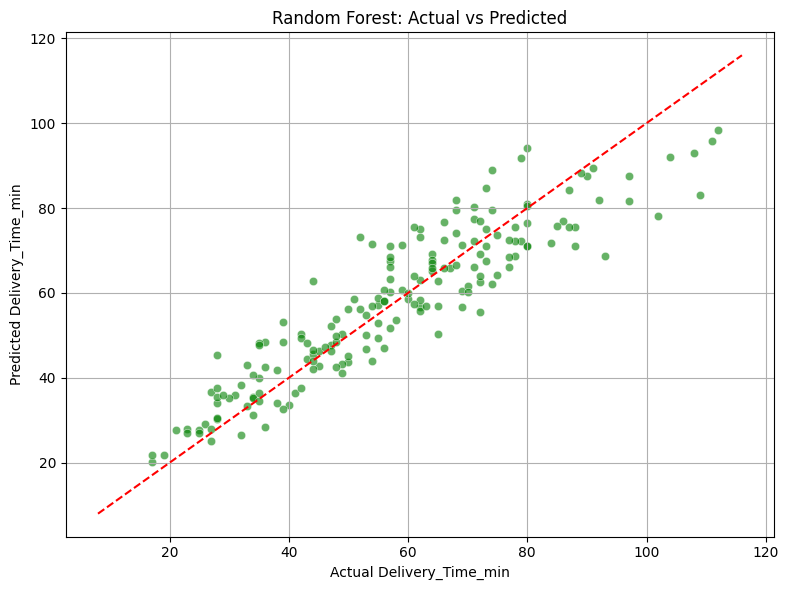

In [ ]:

# 8. Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect line
plt.xlabel("Actual Delivery_Time_min")
plt.ylabel("Predicted Delivery_Time_min")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()